In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [9]:
df = pd.read_csv('GE.csv')
#df = dataframe[['Date', 'Close']]
#df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1008 non-null   datetime64[ns]
 1   Open           1008 non-null   float64       
 2   High           1008 non-null   float64       
 3   Low            1008 non-null   float64       
 4   Close          1008 non-null   float64       
 5   Adj Close      1008 non-null   float64       
 6   Volume         1008 non-null   int64         
 7   anomaly_score  1008 non-null   float64       
 8   anomaly        1008 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 67.1 KB


In [28]:
anomaly_inputs=['Close']

In [29]:
model_IF=IsolationForest(contamination=0.1,random_state=42)

In [30]:
model_IF.fit(df[anomaly_inputs])

C:\Users\vinayak raj urs\.conda\envs\tf2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [31]:
df['anomaly_score']=model_IF.decision_function(df[anomaly_inputs])

In [32]:
df['anomaly']=model_IF.predict(df[anomaly_inputs])

C:\Users\vinayak raj urs\.conda\envs\tf2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [33]:
df.loc[:,['Date','Close','anomaly_score','anomaly']]

,Date,Close,anomaly_score,anomaly
0,2018-01-02,107.968536,-0.205566,-1
1,2018-01-03,108.989372,-0.213636,-1
2,2018-01-04,111.271240,-0.214651,-1
3,2018-01-05,111.331291,-0.214651,-1
4,2018-01-08,109.770012,-0.214143,-1
...,...,...,...,...
1003,2021-12-27,73.864166,0.072095,1
1004,2021-12-28,74.395004,0.070062,1
1005,2021-12-29,73.996880,0.073925,1
1006,2021-12-30,73.926620,0.072615,1


In [34]:
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['Close'] = test[seq_size:]['Close']

NameError: name 'test' is not defined

In [42]:
df['anomaly_points']=df['anomalies']

KeyError: 'anomalies'

In [46]:
anomalies = [df['anomaly'] == -1]

In [47]:
anomalies

[0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 1003    False
 1004    False
 1005    False
 1006    False
 1007    False
 Name: anomaly, Length: 1008, dtype: bool]

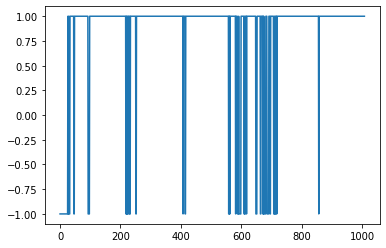

In [49]:
#Plot anomalies for  data
#plt.plot(df['Close'])
plt.plot(df['anomaly'])
#sns.scatterplot(x=anomalies['Date'], y=anomalies[['Close']], color='r')